<a href="https://colab.research.google.com/github/farnazmnz/Students-Academic-Performance/blob/main/final_project_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Libraries & Constants***

In [ ]:
import os
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [ ]:
!gdown --id 1-Zyp-JP3f9QhPKaErBkPPFNKaPS1v74u

Downloading...
From: https://drive.google.com/uc?id=1-Zyp-JP3f9QhPKaErBkPPFNKaPS1v74u
To: /content/Dataset.csv
100% 38.0k/38.0k [00:00<00:00, 42.1MB/s]


In [ ]:
categorical_attr = ['gender', 'NationalITy', 'PlaceofBirth', 'StageID', 'GradeID', 'SectionID', 'Topic', 'Semester', 'Relation', 'ParentAnsweringSurvey', 'ParentschoolSatisfaction', 'StudentAbsenceDays', 'Class']

# ***Preprocessing***

Reading & displaying data:

In [ ]:
df = pd.read_csv('/content/Dataset.csv')
df.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M


In [ ]:
print(df.shape)

(480, 17)


In [ ]:
# Converting Categorical values to scaler values
le = LabelEncoder()
df[categorical_attr] = df[categorical_attr].apply(le.fit_transform, axis=0)

In [ ]:
df.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,1,4,4,2,1,0,7,0,0,15,16,2,20,1,1,1,2
1,1,4,4,2,1,0,7,0,0,20,20,3,25,1,1,1,2
2,1,4,4,2,1,0,7,0,0,10,7,0,30,0,0,0,1
3,1,4,4,2,1,0,7,0,0,30,25,5,35,0,0,0,1
4,1,4,4,2,1,0,7,0,0,40,50,12,50,0,0,0,2


In [ ]:
# X: Features, y: Classes
X = np.array(df.iloc[:, :-1])
y = np.array(df['Class'])

In [ ]:
# Deviding Dataset to training and validation set
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=12)

In [ ]:
print('Number of dataset: ', len(X))
print('Number of train set: ', len(X_train))
print('Number of validation set: ', len(X_val))
print("shape of x_train",X_train.shape)
print("shape of y_train",y_train.shape)
print("shape of x_valid",X_val.shape)
print("shape of y_valid",y_val.shape)

Number of dataset:  480
Number of train set:  384
Number of validation set:  96
shape of x_train (384, 16)
shape of y_train (384,)
shape of x_valid (96, 16)
shape of y_valid (96,)


In [ ]:
#reshape rank1 array
y_train = y_train.reshape( y_train.shape[0],1)
print(y_train.shape)
y_val= y_val.reshape(y_val.shape[0],1)
print(y_val.shape)

(384, 1)
(96, 1)


In [ ]:
#convert outputs=2 to 1
y_train[y_train==2]=1
y_val[y_val==2]=1

# standardize data

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)




In [ ]:
#transpose matrix
X_train=X_train.T
y_train=y_train.T
X_val=X_val.T
y_val=y_val.T


# ***Implementing Model 2 layer( with random weight and bias)***

# constants

In [ ]:
n_input=16
n_output=1
alpha=0.1
epoch=1000


# sigmoid:

In [ ]:
def sigmoid_func(z):
    return 1.0/(1+np.exp(-z))

def sigmoid_deriv(u):
    return  u * (1-u)

# forward propagation(2 layer):

In [ ]:
def forward_prop(x,w,b):

    z = np.dot(w.T,x)+b
    a = sigmoid_func(z)

    return a

# backward propagation(2 layer):

In [ ]:
def backward_prop(x,y,out ,w,b):
   m=X_train.shape[1]
   dz = out-y
   dw =(1/m)*np.dot(x,dz.T)
   db= (1/m)*np.sum(dz)
   w = w-(alpha*dw)
   b = b-(alpha*db)

   return w,b




# cost:

In [ ]:
def loss(y,a):
    m =y.shape[1]
    E = y * np.log(a) + (1 - y) * np.log(1 - a)

    #convert nan or -inf outputs to numbers
    E[np.isnan(E)] = 0
    E[np.isneginf(E)] = -1

    cost = (-1/m) * np.sum(E)


    return cost

# accuracy:

In [ ]:

def acuracy_neural(A,Y):

    len=Y.shape[1]
    A = np.round(A)

    count = np.sum(np.equal(A,Y))
    ac = ( count / len) * 100


    #from sklearn.metrics import  accuracy_score
    #Accuracy_score = accuracy_score(Y, p_out)
    #print("Accuracy Score:",accuracy_score(Y, p_out))

    return ac


# randomize weight  and bias

In [ ]:
def random(n_input,n_output):
   w = np.random.randn(n_input,n_output)*0.01
   b = np.random.randn(1,n_output)*0.01

   return w,b

In [ ]:
#create arrays for saving cost and accuracy to show in graph
cost_train=[]
cost_val=[]
acc_train=[]
acc_val=[]

#if w=b=0
cost_t=[]
cost_v=[]
acc_t=[]
acc_v=[]


# train

In [ ]:
def train(x,y ,X_val,y_val,w,b):

   for i in range(epoch):

    # Implement the forward propagation module
     out = forward_prop(x,w,b)
     #Compute the loss at the final layer
     cost = loss(y,out)
    # Implement the backward propagation module
     #Finally, update the parameters
     w , b = backward_prop(x,y,out ,w,b)
     #final output with accuracy
     an,pred,accu = out_prediction(x,y,w,b)

     #Use trained parameters to test model
     answ,outt,ac= out_prediction(X_val,y_val,w,b)
     costs = loss(y_val,answ)


     if i%10 == 0:
            print("*------------------------------*")
            print("train")
            print("ACCURACY after iteration % i: % f" %(i, accu))
            print("COST after iteration % i: % f" %(i, cost))
            print("................................................")

            print("test")
            print("ACCURACY after iteration % i: % f" %(i, ac))
            print("COST after iteration % i: % f" %(i, costs))
            print("*------------------------------*")
            cost_train.append(cost)
            acc_train.append(accu)
            cost_val.append(costs)
            acc_val.append(ac)

   return cost_train,cost_val,acc_train,acc_val



def train_0(x,y ,X_val,y_val,w,b):

   for i in range(epoch):

     out = forward_prop(x,w,b)
     cost = loss(y,out)
     w , b = backward_prop(x,y,out ,w,b)

     an,pred,accu = out_prediction(x,y,w,b)

     answ,outt,ac= out_prediction(X_val,y_val,w,b)

     costs = loss(y_val,answ)

     if i%10 ==0:
            print("*------------------------------*")
            print("train")
            print("ACCURACY after iteration % i: % f" %(i, accu))
            print("COST after iteration % i: % f" %(i, cost))
            print("................................................")

            print("test")
            print("ACCURACY after iteration % i: % f" %(i, ac))
            print("COST after iteration % i: % f" %(i, costs))
            print("*------------------------------*")
            cost_t.append(cost)
            acc_t.append(accu)
            cost_v.append(costs)
            acc_v.append(ac)

   return cost_t,cost_v,acc_t,acc_v



def out_prediction(x,y,w,b):
   ans = np.zeros(( 1 , x.shape[1]))
   ans = forward_prop(x,w ,b )
   pr=ans
   pr=np.round(pr)
   acc = acuracy_neural(ans , y)

   return ans,pr,acc




# make 2layer neural network

In [ ]:
def neural_network(n_input,n_output,X_train,y_train,X_valid,y_valid,epoch,alpha):
   #initialize parameter
   w,b = random(n_input,n_output)

   cost_train, cost_val, acc_train,acc_val= train(X_train,y_train,X_valid,y_valid ,w,b)






#create model

neural_network(n_input,n_output,X_train,y_train,X_val,y_val,epoch,alpha)

*------------------------------*
train
ACCURACY after iteration  0:  70.312500
COST after iteration  0:  0.690795
................................................
test
ACCURACY after iteration  0:  78.125000
COST after iteration  0:  0.661998
*------------------------------*
*------------------------------*
train
ACCURACY after iteration  10:  77.343750
COST after iteration  10:  0.524430
................................................
test
ACCURACY after iteration  10:  78.125000
COST after iteration  10:  0.528719
*------------------------------*
*------------------------------*
train
ACCURACY after iteration  20:  79.427083
COST after iteration  20:  0.465090
................................................
test
ACCURACY after iteration  20:  80.208333
COST after iteration  20:  0.485222
*------------------------------*
*------------------------------*
train
ACCURACY after iteration  30:  81.770833
COST after iteration  30:  0.431539
................................................

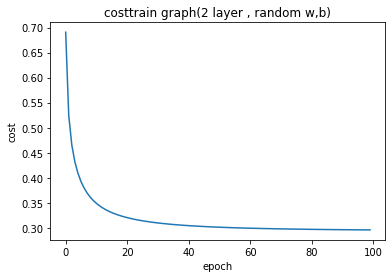

In [ ]:
plt.plot(cost_train)

# naming the x axis
plt.xlabel('epoch')
# naming the y axis
plt.ylabel('cost')

# giving a title to my graph
plt.title('costtrain graph(2 layer , random w,b)')

# function to show the plot
plt.show()

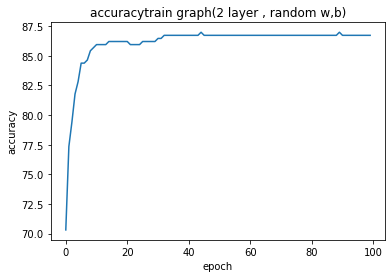

In [ ]:
plt.plot(acc_train)

# naming the x axis
plt.xlabel('epoch')
# naming the y axis
plt.ylabel('accuracy')

# giving a title to my graph
plt.title('accuracytrain graph(2 layer , random w,b)')

# function to show the plot
plt.show()

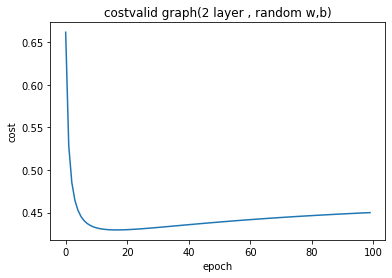

In [ ]:
plt.plot(cost_val)

# naming the x axis
plt.xlabel('epoch')
# naming the y axis
plt.ylabel('cost')

# giving a title to my graph
plt.title('costvalid graph(2 layer , random w,b)')

# function to show the plot
plt.show()

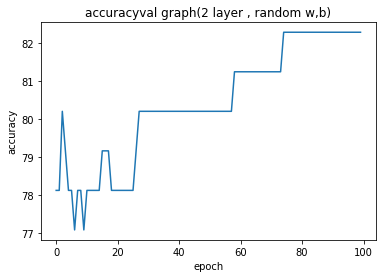

In [ ]:
plt.plot(acc_val)

# naming the x axis
plt.xlabel('epoch')
# naming the y axis
plt.ylabel('accuracy')

# giving a title to my graph
plt.title('accuracyval graph(2 layer , random w,b)')

# function to show the plot
plt.show()

# make 2 layer with zero weight and bias

In [ ]:
def zero(n_input,n_output):
     w1 = np.zeros((n_input,n_output))

     b1 = np.zeros((1,n_output))
     return w1,b1

In [ ]:

def neural_network_0(n_input,n_output,X_train,y_train,X_valid,y_valid,epoch,alpha):
   #initialize parameter
   w1,b1 = zero(n_input,n_output)

   cost_t,cost_v,acc_t,acc_v = train_0(X_train,y_train,X_valid,y_valid ,w1,b1)





neural_network_0(n_input,n_output,X_train,y_train,X_val,y_val,epoch,alpha)

*------------------------------*
train
ACCURACY after iteration  0:  75.781250
COST after iteration  0:  0.693147
................................................
test
ACCURACY after iteration  0:  75.000000
COST after iteration  0:  0.664623
*------------------------------*
*------------------------------*
train
ACCURACY after iteration  10:  77.604167
COST after iteration  10:  0.523100
................................................
test
ACCURACY after iteration  10:  77.083333
COST after iteration  10:  0.528108
*------------------------------*
*------------------------------*
train
ACCURACY after iteration  20:  79.687500
COST after iteration  20:  0.463742
................................................
test
ACCURACY after iteration  20:  80.208333
COST after iteration  20:  0.484350
*------------------------------*
*------------------------------*
train
ACCURACY after iteration  30:  81.770833
COST after iteration  30:  0.430482
................................................

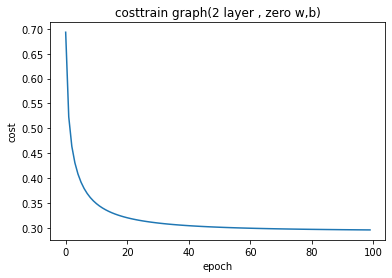

In [ ]:
plt.plot(cost_t)

# naming the x axis
plt.xlabel('epoch')
# naming the y axis
plt.ylabel('cost')

# giving a title to my graph
plt.title('costtrain graph(2 layer , zero w,b)')

# function to show the plot
plt.show()

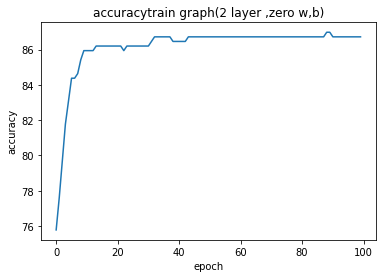

In [ ]:
plt.plot(acc_t)

# naming the x axis
plt.xlabel('epoch')
# naming the y axis
plt.ylabel('accuracy')

# giving a title to my graph
plt.title('accuracytrain graph(2 layer ,zero w,b)')

# function to show the plot
plt.show()

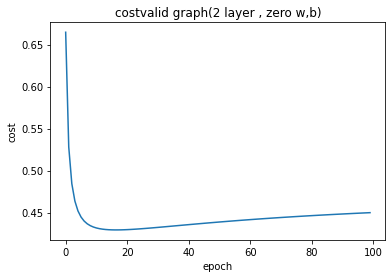

In [ ]:
plt.plot(cost_v)

# naming the x axis
plt.xlabel('epoch')
# naming the y axis
plt.ylabel('cost')

# giving a title to my graph
plt.title('costvalid graph(2 layer , zero w,b)')

# function to show the plot
plt.show()

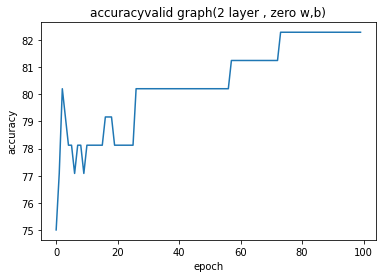

In [ ]:
plt.plot(acc_v)

# naming the x axis
plt.xlabel('epoch')
# naming the y axis
plt.ylabel('accuracy')

# giving a title to my graph
plt.title('accuracyvalid graph(2 layer , zero w,b)')

# function to show the plot
plt.show()

# ***l layer model for 3 & 5 layer***

# generate random weight and bias

In [ ]:
def initialize_random_parameters(n_neuron):
    # 0th layer is the input layer with number

    #save w and b of each layer in dictionary
    parameters = {}

    # number of layers in the network

    length = len(n_neuron)

    for l in range(1, length):
      #weight
        parameters['W' + str(l)] = np.random.randn(n_neuron[l],n_neuron[l - 1])*0.1
      #bias
        parameters['b' + str(l)] = np.random.randn(n_neuron[l],1) * 0.1

    return parameters

# zero weight and bias

In [ ]:
def initialize_zero_parameters(n_neuron):
    # 0th layer is the input layer with number

    #save w and b of each layer in dictionary
    parameter = {}

    # number of layers in the network

    length = len(n_neuron)

    for l in range(1, length):
      #weight
        parameter['W' + str(l)] = np.zeros((n_neuron[l],n_neuron[l - 1]))
      #bias
        parameter['b' + str(l)] = np.zeros((n_neuron[l],1))

    return parameter

# sigmoid

In [ ]:
def sigmoid(z):

    return 1.0/(1+np.exp(-z)) , z

def sigmod_backward(da, z):

    s = 1/(1+np.exp(-z))
    dz = da * s * (1-s)

    return dz

# relu

In [ ]:
def relu(z):

    return np.maximum(0,z) , z

def relu_backward(da, Z):

    dZ = np.array(da, copy=True)
    # When z <= 0,  set dz to 0
    dZ[Z <= 0] = 0

    return dZ

# forward propagation (l_layer)

In [ ]:
def forward(A , W, b):

    # cache use in backward
    Z = np.dot(W, A ) + b
    cache = (A, W, b)

    return Z, cache

In [ ]:
def activation_forward(A , W, b, activation):

    # seperate forward method  for each activation function
    if activation == "sigmoid":
        Z, linear_cache = forward(A, W, b)
        A, activation_cache = sigmoid(Z)
    elif activation == "relu":
        Z, linear_cache = forward(A, W, b)
        A, activation_cache = relu(Z)

    cache = (linear_cache, activation_cache)

    return A, cache

In [ ]:
def l_layer_forward(X, parameters):

    """
    X -- data, numpy array of shape (input size, number of examples)
    parameters -- output of initialize_parameters_deep()
    AL -- last post-activation value

    """
    caches = []
    A = X

    # number of layers in model
    L = len(parameters) // 2

    # relu forward for (l-1)layer
    for l in range(1, L):
        A_prev = A
        A, cache = activation_forward(A_prev,parameters['W' + str(l)],parameters['b' + str(l)], 'relu')
        caches.append(cache)

    # sigmod forward for last layer
    AL, cache = activation_forward(A, parameters['W' + str(L)],parameters['b' + str(L)], 'sigmoid')
    caches.append(cache)

    return AL, caches

# backward propagation (l_layer)

In [ ]:
def  backward(dZ, cache):

    a_prev, W, b = cache
    m = a_prev.shape[1]
    #gradient descent
    dW = (1 / m)*np.dot(dZ, a_prev.T)
    db = (1 / m)*np.sum(dZ, axis = 1, keepdims = True)
    da_prev = np.dot(W.T, dZ)

    return da_prev, dW, db

In [ ]:
def  activation_backward(dA, cache, activation):


    # seperate backward method  for each activation function
    if activation == "relu":
        dZ = relu_backward(dA, cache[1])
        dA_prev,dW,db = backward(dZ,cache[0])


    elif activation == "sigmoid":
        dZ = sigmod_backward(dA, cache[1])
        dA_prev,dW,db = backward(dZ,cache[0])

    return dA_prev, dW, db

In [ ]:
def l_layer_backward(AL, Y, caches):

    """
    AL --  output of the forward propagation (L_layer_forward())
    derivative -- A dictionary with the gradients of each parameters
             derivative["dA" + str(l)] = ...
             derivative["dW" + str(l)] = ...
             derivative["db" + str(l)] = ...
    """
    derivative = {}
    # number of layer
    L = len(caches)
    m = AL.shape[1]

     # derivative of cost with  AL
    dAL = - (np.divide(Y, AL) - np.divide(1 - Y, 1 - AL))

    # Lth layer (SIGMOID -> LINEAR) gradients
    cur_cache = caches[L - 1]
    derivative["dA" + str(L-1)],derivative["dW" + str(L)], derivative["db" + str(L)] =  activation_backward(dAL, cur_cache, 'sigmoid')


    for l in reversed(range(L-1)):

        cur_cache = caches[l]
        da_prev_temp, dW_temp, db_temp = activation_backward(derivative['dA' + str(l + 1)], cur_cache, 'relu')

        derivative["dA" + str(l)] = da_prev_temp
        derivative["dW" + str(l + 1)] = dW_temp
        derivative["db" + str(l + 1)] = db_temp

    return derivative






In [ ]:
def update_param(parameters, grads, learning_rate):
   # number of layers in the neural network
    L = len(parameters) // 2

    # Update rule for each parameter
    for l in range(L):
        parameters["W" + str(l + 1)] = parameters["W" + str(l + 1)] - learning_rate * grads['dW' + str(l + 1)]
        parameters["b" + str(l + 1)] = parameters['b' + str(l + 1)] - learning_rate * grads['db' + str(l + 1)]

    return parameters

# cost

In [ ]:
def compute_cost(Y, AL):

   # cost function defined by the equation.

    m = Y.shape[1]
    loss = Y * np.log(AL) + (1 - Y) * np.log(1 - AL)
    loss[np.isnan(loss)] = 0
    loss[np.isneginf(loss)] = -1
    cost = ((-1/m) * np.sum(loss))
    #cost = np.squeeze(np.array(cost))

    return cost

# accuracy

In [ ]:
def acuracy_neurall(A,Y):

    len=Y.shape[1]

    count = np.sum(np.equal(A,Y))
    ac = ( count / len ) * 100


    return ac

# predict output

In [ ]:
def calculate_output(x,y,parameter):

   out = np.zeros(( 1 ,x.shape[1] ))
   A, cache = l_layer_forward(x, parameter)
   out = A
   out = np.round(out)
   acc = acuracy_neurall(out , y)

   return A,out,acc

# implement model

In [ ]:
def model(X, Y,xv,yv, layers, params,learning_rate  , n_iterat   ):

    """
    X -- data, number of examples
    Y -- true answer v

    """

   #array for saving  cost and accuracy to  plot
    costs_t = []
    accuracy_t = []
    cost_v = []
    accuracy_v = []

    parameters = params

    # epoch
    for i in range(0, n_iterat):

        # Forward propagation:   relu (L-1) ->  SIGMOID (L)
        AL, caches = l_layer_forward(X, parameters)

        # cost train
        cost = compute_cost(Y, AL)

        # Backward propagation.
        grads = l_layer_backward(AL, Y, caches)

        # Update parameters.
        parameters = update_param(parameters, grads, learning_rate)


        #output train
        a,o,accu = calculate_output(X,Y,parameters)

        #output test
        a1,ot,accur = calculate_output(xv,yv,parameters)

        #cost test
        costv=compute_cost(yv, a1)


        # Print the cost every (learning rate/10) training example
        if  i % 10  == 0:
            print("*------------------------------*")
            print("train")
            print("ACCURACY after iteration % i: % f" %(i, accu))
            print("COST after iteration % i: % f" %(i, cost))
            print("................................................")

            print("test")
            print("ACCURACY after iteration % i: % f" %(i, accur))
            print("COST after iteration % i: % f" %(i, costv))
            print("*------------------------------*")

            #store in array
            costs_t.append(cost)
            accuracy_t.append(accu)
            cost_v.append(costv)
            accuracy_v.append(accur)



    return cost_t,accuracy_t,cost_v,accuracy_v

# train 3 layer model with random parameter

In [ ]:
n_in=16
n_hid=50
n_out=1
learningrate=0.1
epoc=1000

layer_neuron=[n_in,n_hid,n_out]
para=initialize_random_parameters(layer_neuron)
ct,act,cv,acv=model(X_train, y_train,X_val,y_val, layer_neuron,para, learningrate, epoc )

*------------------------------*
train
ACCURACY after iteration  0:  34.114583
COST after iteration  0:  0.756526
................................................
test
ACCURACY after iteration  0:  43.750000
COST after iteration  0:  0.699611
*------------------------------*
*------------------------------*
train
ACCURACY after iteration  10:  79.687500
COST after iteration  10:  0.564786
................................................
test
ACCURACY after iteration  10:  67.708333
COST after iteration  10:  0.598759
*------------------------------*
*------------------------------*
train
ACCURACY after iteration  20:  79.687500
COST after iteration  20:  0.486292
................................................
test
ACCURACY after iteration  20:  65.625000
COST after iteration  20:  0.553811
*------------------------------*
*------------------------------*
train
ACCURACY after iteration  30:  80.729167
COST after iteration  30:  0.441711
................................................

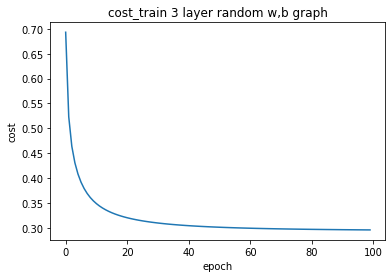

In [ ]:
plt.plot(ct)

# naming the x axis
plt.xlabel('epoch')
# naming the y axis
plt.ylabel('cost')

# giving a title to my graph
plt.title('cost_train 3 layer random w,b graph')

# function to show the plot
plt.show()

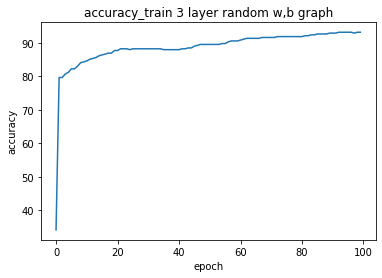

In [ ]:
plt.plot(act)

# naming the x axis
plt.xlabel('epoch')
# naming the y axis
plt.ylabel('accuracy')

# giving a title to my graph
plt.title('accuracy_train 3 layer random w,b graph')

# function to show the plot
plt.show()

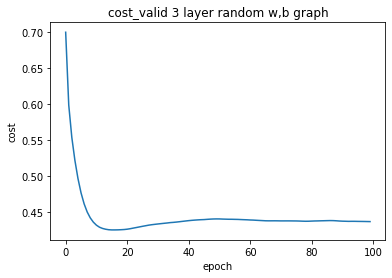

In [ ]:
plt.plot(cv)

# naming the x axis
plt.xlabel('epoch')
# naming the y axis
plt.ylabel('cost')

# giving a title to my graph
plt.title('cost_valid 3 layer random w,b graph')

# function to show the plot
plt.show()

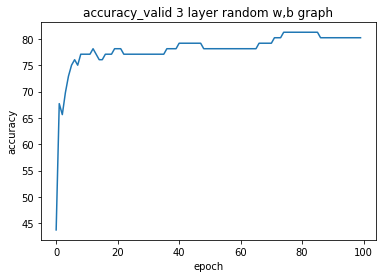

In [ ]:
plt.plot(acv)

# naming the x axis
plt.xlabel('epoch')
# naming the y axis
plt.ylabel('accuracy')

# giving a title to my graph
plt.title('accuracy_valid 3 layer random w,b graph')

# function to show the plot
plt.show()

# train 3 layer model with zero parameter

In [ ]:
par=initialize_zero_parameters(layer_neuron)
ct0,act0,cv0,acv0=model(X_train, y_train,X_val,y_val, layer_neuron,para, learningrate, epoc )

*------------------------------*
train
ACCURACY after iteration  0:  93.229167
COST after iteration  0:  0.180814
................................................
test
ACCURACY after iteration  0:  80.208333
COST after iteration  0:  0.436959
*------------------------------*
*------------------------------*
train
ACCURACY after iteration  10:  93.229167
COST after iteration  10:  0.179818
................................................
test
ACCURACY after iteration  10:  80.208333
COST after iteration  10:  0.436884
*------------------------------*
*------------------------------*
train
ACCURACY after iteration  20:  93.229167
COST after iteration  20:  0.178818
................................................
test
ACCURACY after iteration  20:  80.208333
COST after iteration  20:  0.436847
*------------------------------*
*------------------------------*
train
ACCURACY after iteration  30:  93.229167
COST after iteration  30:  0.177815
................................................

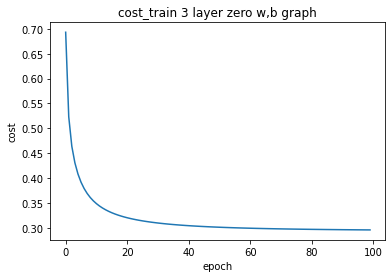

In [ ]:
plt.plot(ct0)

# naming the x axis
plt.xlabel('epoch')
# naming the y axis
plt.ylabel('cost')

# giving a title to my graph
plt.title('cost_train 3 layer zero w,b graph')

# function to show the plot
plt.show()

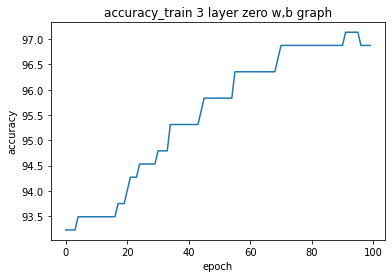

In [ ]:
plt.plot(act0)

# naming the x axis
plt.xlabel('epoch')
# naming the y axis
plt.ylabel('accuracy')

# giving a title to my graph
plt.title('accuracy_train 3 layer zero w,b graph')

# function to show the plot
plt.show()

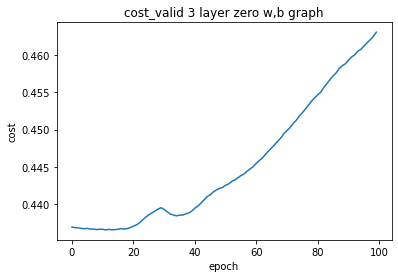

In [ ]:
plt.plot(cv0)

# naming the x axis
plt.xlabel('epoch')
# naming the y axis
plt.ylabel('cost')

# giving a title to my graph
plt.title('cost_valid 3 layer zero w,b graph')

# function to show the plot
plt.show()

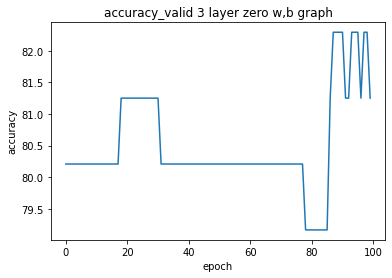

In [ ]:
plt.plot(acv0)

# naming the x axis
plt.xlabel('epoch')
# naming the y axis
plt.ylabel('accuracy')

# giving a title to my graph
plt.title('accuracy_valid 3 layer zero w,b graph')

# function to show the plot
plt.show()

# train 5 layer model with random parameter

In [ ]:
n_in=16
n_h1=20
n_h2=50
n_h3=36
n_out=1
learningrate=0.1
epoc=1000

layer_5=[n_in,n_h1,n_h2,n_h3,n_out]
p5=initialize_random_parameters(layer_5)
ct5,act5,cv5,acv5=model(X_train, y_train,X_val,y_val, layer_5,p5, learningrate, epoc )

*------------------------------*
train
ACCURACY after iteration  0:  73.177083
COST after iteration  0:  0.685119
................................................
test
ACCURACY after iteration  0:  59.375000
COST after iteration  0:  0.689772
*------------------------------*
*------------------------------*
train
ACCURACY after iteration  10:  73.177083
COST after iteration  10:  0.625532
................................................
test
ACCURACY after iteration  10:  59.375000
COST after iteration  10:  0.676510
*------------------------------*
*------------------------------*
train
ACCURACY after iteration  20:  73.177083
COST after iteration  20:  0.596396
................................................
test
ACCURACY after iteration  20:  59.375000
COST after iteration  20:  0.678767
*------------------------------*
*------------------------------*
train
ACCURACY after iteration  30:  73.177083
COST after iteration  30:  0.580347
................................................

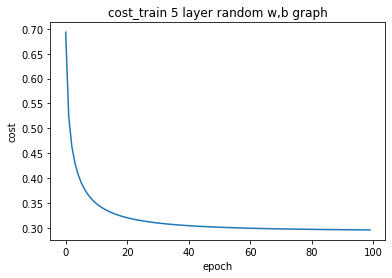

In [ ]:
plt.plot(ct5)

# naming the x axis
plt.xlabel('epoch')
# naming the y axis
plt.ylabel('cost')

# giving a title to my graph
plt.title('cost_train 5 layer random w,b graph')

# function to show the plot
plt.show()

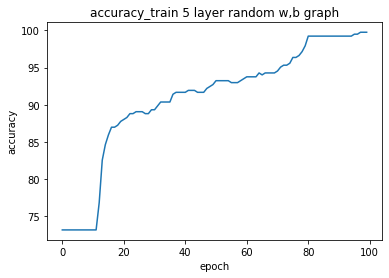

In [ ]:
plt.plot(act5)

# naming the x axis
plt.xlabel('epoch')
# naming the y axis
plt.ylabel('accuracy')

# giving a title to my graph
plt.title('accuracy_train 5 layer random w,b graph')

# function to show the plot
plt.show()

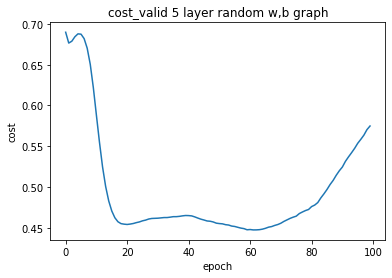

In [ ]:
plt.plot(cv5)

# naming the x axis
plt.xlabel('epoch')
# naming the y axis
plt.ylabel('cost')

# giving a title to my graph
plt.title('cost_valid 5 layer random w,b graph')

# function to show the plot
plt.show()

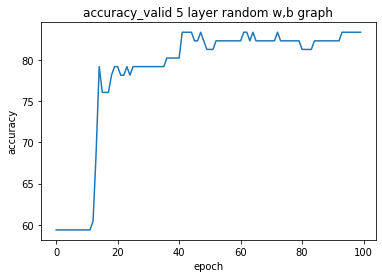

In [ ]:
plt.plot(acv5)

# naming the x axis
plt.xlabel('epoch')
# naming the y axis
plt.ylabel('accuracy')

# giving a title to my graph
plt.title('accuracy_valid 5 layer random w,b graph')

# function to show the plot
plt.show()

# train 5 layer model with zero parameter

In [ ]:
pa5=initialize_zero_parameters(layer_5)
ct05,act05,cv05,acv05=model(X_train, y_train,X_val,y_val, layer_5,pa5, learningrate, epoc )

*------------------------------*
train
ACCURACY after iteration  0:  73.177083
COST after iteration  0:  0.693147
................................................
test
ACCURACY after iteration  0:  59.375000
COST after iteration  0:  0.691041
*------------------------------*
*------------------------------*
train
ACCURACY after iteration  10:  73.177083
COST after iteration  10:  0.650445
................................................
test
ACCURACY after iteration  10:  59.375000
COST after iteration  10:  0.678353
*------------------------------*
*------------------------------*
train
ACCURACY after iteration  20:  73.177083
COST after iteration  20:  0.624570
................................................
test
ACCURACY after iteration  20:  59.375000
COST after iteration  20:  0.675466
*------------------------------*
*------------------------------*
train
ACCURACY after iteration  30:  73.177083
COST after iteration  30:  0.608719
................................................

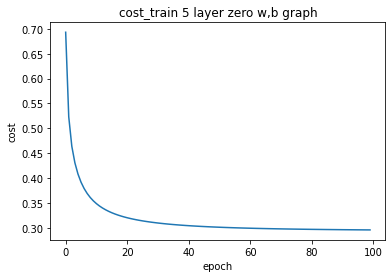

In [ ]:
plt.plot(ct05)

# naming the x axis
plt.xlabel('epoch')
# naming the y axis
plt.ylabel('cost')

# giving a title to my graph
plt.title('cost_train 5 layer zero w,b graph')

# function to show the plot
plt.show()

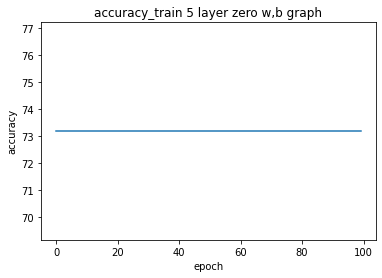

In [ ]:
plt.plot(act05)

# naming the x axis
plt.xlabel('epoch')
# naming the y axis
plt.ylabel('accuracy')

# giving a title to my graph
plt.title('accuracy_train 5 layer zero w,b graph')

# function to show the plot
plt.show()

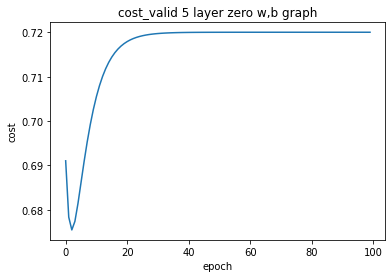

In [ ]:
plt.plot(cv05)

# naming the x axis
plt.xlabel('epoch')
# naming the y axis
plt.ylabel('cost')

# giving a title to my graph
plt.title('cost_valid 5 layer zero w,b graph')

# function to show the plot
plt.show()

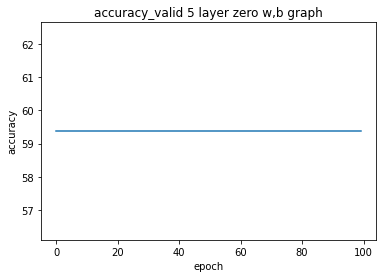

In [ ]:
plt.plot(acv05)

# naming the x axis
plt.xlabel('epoch')
# naming the y axis
plt.ylabel('accuracy')

# giving a title to my graph
plt.title('accuracy_valid 5 layer zero w,b graph')

# function to show the plot
plt.show()